# Spam/Ham Classifier
## Step-by-step Analysis
1. Import Necessary Dependencies
2. Import Dataset and Data Handling
3. Text Preprocessing
   - Stemming
   - Using Stopwords
4. Feature Extraction (Vectorisation)
    - C-BOW
    - TF-IDF
5. Model Building and evaluating
6. Predicting the model
7. Performance metrics and accuracy score.
8. Conclusion

## 1. Import necessary dependencies

In [1]:
import numpy as np
import pandas as pd #for data handling

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#For model building, and performance metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re #regular expression

## 2. Import the Dataset
- The dataset is a tab-separated spam classification text where we will be implementing NLP methods like stemming, stopwords and Word embedding techniques.
- We have two columns, output- label and input- message.

In [2]:
# Reading a text file with Pandas
df = pd.read_csv('SMSSpamCollection.txt', sep='\t',names= ['label','message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data Handling

In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.isnull().sum() #There are no null values in the dataset.

label      0
message    0
dtype: int64

In [7]:
df['message'].iloc[1554], df['label'].iloc[1554]

('Ok how you dear. Did you call chechi', 'ham')

In [8]:
#Separating the dataframe into input features (messages) and output labels
X = df['message']
y = df['label']
len(X), len(y)  # Displaying the length of X (messages) and y (labels)

(5572, 5572)

#### Data Visualization - Distribution of Spam and Ham messages in the dataset.

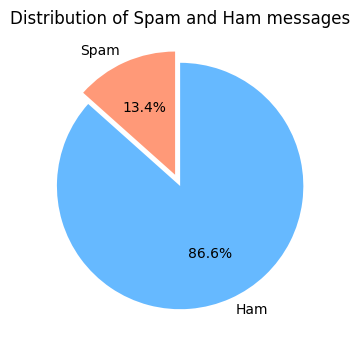

In [9]:
#Count the number of spam and ham messages
spam = df[df['label']=='spam'].shape[0]
ham = df[df['label']=='ham'].shape[0]

#Data for the pie chart
labels = ['Spam', 'Ham']
sizes = [spam, ham]
explode = (0.1,0) #To highlight the spam slice, it'll be exploded a bit
colors = ['#ff9978','#66b9ff'] 
autopct='%1.1f%%'

#Creating the pie chart
plt.figure(figsize=(6,4))
plt.pie(sizes,colors=colors, explode=explode, labels=labels,startangle=90,autopct=autopct)
plt.title('Distribution of Spam and Ham messages', )
plt.show()

In [10]:
# Convert the labels 'spam' to 1 and 'ham' to 0 in the variable y
y = [1 if label == 'spam' else 0 for label in y]

## 3. Text Preprocessing
### 3.1 Stemming and Using stopwords

In [11]:
# nltk.download("stopwords")

In [12]:
# ps = PorterStemmer()
lemm = WordNetLemmatizer()
stop_words = stopwords.words("english")

In [13]:
# nltk.download('wordnet')

In [14]:
corpus = []
for i in range(len(X)):
    text = re.sub('[^a-zA-Z0-9]',' ',X[i]) #Preprocessing the text data by removing special characters
    text = text.lower() # Text is converted to lowercase #
    text = text.split() #Text is split into individual words.

    text = [lemm.lemmatize(word) for word in text if word not in stop_words]  #Lemmatization is applied to obtain the base forms of words, and stopwords are removed from the text
    text = " ".join(text) # The cleaned text is then joined back into sentences
    corpus.append(text) #The cleaned text is appended to the 'corpus' list.

corpus # The 'corpus' variable contains the preprocessed text data.

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune',
 'winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6days 16 tsandcs apply reply

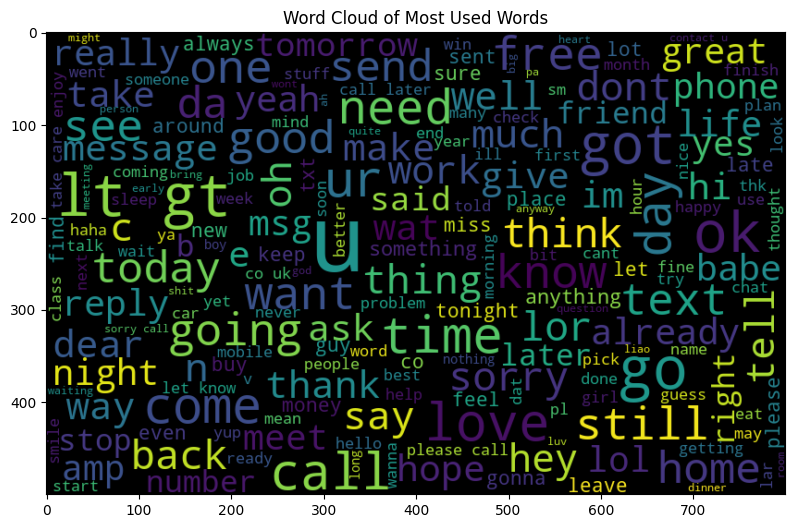

In [15]:
from wordcloud import WordCloud

#Converting the corpus list to string variable
all_words = ' '.join([text for text in corpus])
# print(type(all_words))

# Generating a word cloud to visualize the occurrence of most used words
wordcloud = WordCloud(width=800, height=500,random_state=65,max_font_size=100).generate(all_words)

# Displaying the word cloud using matplotlib
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Most Used Words")
plt.show()

## 4. Feature Extraction
### 4.1 Vectorisation

In [16]:
#calculate the lengths of sentences in the corpus list
sent_lengths = [len(corpus[i].split(" ")) for i in range(len(corpus))]
print(','.join(map(str, sent_lengths))) #print the length of the sentences in one line with comma as a separable

16,6,25,9,7,19,8,16,18,18,12,23,20,15,2,16,3,12,7,24,3,7,6,15,5,15,3,12,7,7,9,18,3,5,14,14,5,4,4,11,9,11,18,1,9,4,5,4,8,15,5,17,10,21,18,8,23,4,2,5,10,8,3,6,18,14,13,23,7,4,6,2,7,3,2,4,6,5,3,6,3,3,5,2,3,5,13,16,4,8,6,17,21,15,16,21,6,5,20,4,6,13,9,16,19,7,9,4,8,12,4,3,3,17,18,18,17,19,10,9,17,19,5,20,6,5,2,17,1,19,4,1,5,3,20,28,5,2,4,20,11,3,3,20,4,4,6,19,9,3,5,3,11,4,16,35,2,2,10,12,18,10,7,6,22,22,7,17,9,8,7,7,17,3,13,7,7,4,17,6,12,14,3,5,2,4,13,3,16,5,13,9,18,4,10,8,6,4,8,13,4,4,12,20,3,5,10,17,5,10,5,6,3,5,3,3,6,5,7,4,13,5,17,3,19,20,7,24,5,19,3,15,4,4,6,25,6,7,2,16,17,6,6,6,24,4,5,3,5,14,21,7,27,1,18,4,7,6,2,16,6,1,11,6,17,3,4,6,24,4,15,5,18,21,7,3,1,5,3,4,6,3,14,4,1,14,7,1,20,14,20,5,9,4,2,5,22,6,19,7,8,11,17,8,2,22,4,5,9,17,3,21,22,10,20,4,5,20,4,16,3,6,8,24,16,1,4,4,9,3,7,6,8,19,16,18,5,5,2,3,6,4,15,3,2,7,4,14,4,18,7,4,5,17,14,8,23,21,21,16,10,7,3,4,9,14,6,19,14,3,3,10,3,7,16,16,2,4,14,4,16,23,7,6,5,18,5,3,5,19,6,4,6,2,11,6,10,16,21,25,13,24,3,3,5,10,9,19,7,3,21,6,3,16,3,7,5,3,

#### 4.1.1 Bag-Of-Words Model

In [17]:
#Creating a Bag-of-words model using CountVectoriser
cbow = CountVectorizer(binary=True,ngram_range=(1,2))
X_cbow = cbow.fit_transform(corpus).toarray()

In [18]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cbow,y,test_size=0.25,random_state=68)

##### 4.1.1.1 Using Multinomial Naive Bayes (MultinomialNB)

In [19]:
#Model Building
cbow_model = MultinomialNB()
cbow_model.fit(X_train,y_train) #Fit the model
y_pred = cbow_model.predict(X_test) #Model Prediction

In [20]:
#Performance Metrics and Accuracy Score
cbow_score_nb = accuracy_score(y_pred,y_test)
print(f"Accuracy Score for C-BOW Model using Multinomial Naive Bayes: {cbow_score_nb}")

print(f"Classification Report: \n {classification_report(y_pred,y_test)}")

print(confusion_matrix(y_test,y_pred))

Accuracy Score for C-BOW Model using Multinomial Naive Bayes: 0.9741564967695621
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1203
           1       0.95      0.85      0.90       190

    accuracy                           0.97      1393
   macro avg       0.97      0.92      0.94      1393
weighted avg       0.97      0.97      0.97      1393

[[1195   28]
 [   8  162]]


##### 4.1.1.2 Random Forest Classifier
Using Random Forest Classifier instead of Multinomial Naive Bayes (MultinomialNB)

In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [22]:
#Performance Metrics and Accuracy Score
cbow_score_rf = accuracy_score(y_pred,y_test)
print(f"Accuracy Score for C-BOW Model using RF Classifier:\t {cbow_score_rf}")

print(f"Classification Report: \n {classification_report(y_pred,y_test)}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}")


Accuracy Score for C-BOW Model using RF Classifier:	 0.9763101220387652
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1256
           1       0.81      1.00      0.89       137

    accuracy                           0.98      1393
   macro avg       0.90      0.99      0.94      1393
weighted avg       0.98      0.98      0.98      1393

Confusion Matrix: 
 [[1223    0]
 [  33  137]]


#### 4.1.2 TF-IDF VECTORISER

In [23]:
tf = TfidfVectorizer(ngram_range=(1,2),binary=True)
X_tf = tf.fit_transform(corpus).toarray()

In [24]:
#Train-test Split
X_train,X_test,y_train,y_test = train_test_split(X_tf,y,test_size=0.25, random_state=68)

##### 4.1.2.1 Using Multinomial Naive Bayes (MultinomialNB)

In [25]:
#5. Model Building
tf_model = MultinomialNB()
tf_model.fit(X_train,y_train)

#6. Prediction of the model
y_pred = tf_model.predict(X_test)

In [26]:
#7. Performance Metrics and Accuracy Score
tf_score_nb = accuracy_score(y_pred,y_test)
print(f"Accuracy Score for TF-IDF Model using Multinomial Naive Bayes: {tf_score_nb}")

print(f"Classification Report: \n {classification_report(y_pred,y_test)}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}")


Accuracy Score for TF-IDF Model using Multinomial Naive Bayes: 0.9533381191672649
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1288
           1       0.62      1.00      0.76       105

    accuracy                           0.95      1393
   macro avg       0.81      0.97      0.87      1393
weighted avg       0.97      0.95      0.96      1393

Confusion Matrix: 
 [[1223    0]
 [  65  105]]


##### 4.1.2.2 Using Random Forest Classifier
Using Random Forest Classifier instead of Multinomial Naive Bayes (MultinomialNB)

In [27]:
#5. Model Building
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
#6. Model Prediction
y_pred = rf_model.predict(X_test)

In [28]:
#7. Performance Metrics and Accuracy Score
tf_score_rf = accuracy_score(y_pred,y_test)
print(f"Accuracy Score for TF-IDF Model using RF Classifier:\t {tf_score_rf}")

print(f"Classification Report: \n {classification_report(y_pred,y_test)}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}")

Accuracy Score for TF-IDF Model using RF Classifier:	 0.9741564967695621
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1259
           1       0.79      1.00      0.88       134

    accuracy                           0.97      1393
   macro avg       0.89      0.99      0.93      1393
weighted avg       0.98      0.97      0.98      1393

Confusion Matrix: 
 [[1223    0]
 [  36  134]]


# 8. Conclusion
### Visualisation: Accuracy scores for different models and methods

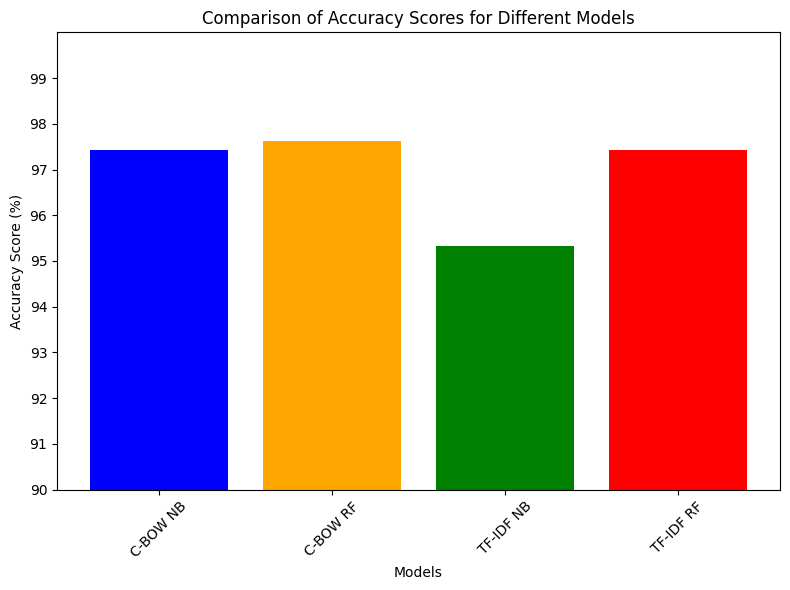

In [32]:
import matplotlib.pyplot as plt

# Accuracy scores for different models and methods
models = ['C-BOW NB', 'C-BOW RF', 'TF-IDF NB', 'TF-IDF RF']
accuracy_scores = [cbow_score_nb*100, cbow_score_rf*100, tf_score_nb*100, tf_score_rf*100]

# Creating a bar chart to compare accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange', 'green', 'red'])
plt.ylim(90, 100)  # Set the y-axis limits for better visualization
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(np.arange(90,100,step=1))
plt.tight_layout()
plt.show()


Accuracy Score for C-BOW Model:
1. Using Multinomial Naive Bayes - 97.41%
2. Using RF Classifier - 97.63%

Accuracy Score for TF-IDF Model:
1. Using Multinomial Naive Bayes - 95.33 %
2. Using RF Classifier - 97.42%

**Key Findings:** 

- Both C-BOW and TF-IDF models achieve high accuracy with Random Forest Classifier, exceeding 97%.
- C-BOW performs slightly better than TF-IDF with Multinomial Naive Bayes.
- Random Forest Classifier consistently outperforms Multinomial Naive Bayes for both models.

#### Model-Specific Observations:
##### C-BOW:
- Achieves highest accuracy of 97.63% with Random Forest Classifier.
- Still performs well with Multinomial Naive Bayes, reaching 97.41%.
##### TF-IDF:
- Achieves slightly lower accuracy overall compared to C-BOW.
- Best accuracy of 97.42% with Random Forest Classifier.
- Accuracy drops to 95.33% with Multinomial Naive Bayes.